In [1]:
import geopandas as gpd
from shapely.geometry import Point

d:\Software\anaconda3\envs\GIS\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [33]:
ids = []
lats = []
lons = []
with open(r"E:\Data\GHCDN\ghcnd-stations.txt") as f:
    t = f.readlines()
    for i in range(len(t)):
        ids.append(t[i].split()[0])
        lats.append(float(t[i].split()[1]))
        lons.append(float(t[i].split()[2]))

In [36]:
gdf = gpd.GeoDataFrame({'station_id':ids,'lon':lons,'lat':lats})
gdf

,station_id,lon,lat
0,ACW00011604,-61.7833,17.1167
1,ACW00011647,-61.7833,17.1333
2,AE000041196,55.5170,25.3330
3,AEM00041194,55.3640,25.2550
4,AEM00041217,54.6510,24.4330
...,...,...,...
118487,ZI000067969,29.3670,-21.0500
118488,ZI000067975,30.8670,-20.0670
118489,ZI000067977,31.5830,-21.0170
118490,ZI000067983,32.6160,-20.2000


C:\Users\LMQ\AppData\Local\Temp\ipykernel_23896\1414783581.py:1: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry'] = gpd.points_from_xy(gdf['lon'],gdf['lat'])


<Axes: >

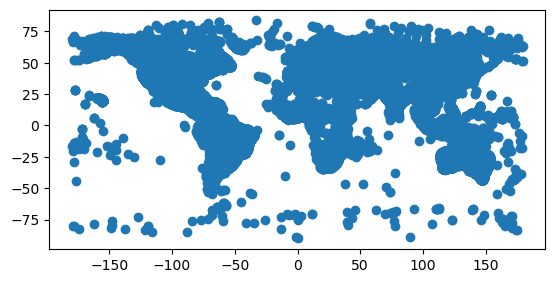

In [37]:
gdf['geometry'] = gpd.points_from_xy(gdf['lon'],gdf['lat'])
gdf.plot()

In [42]:
gdf = gdf.set_crs('epsg:4326')
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
gdf.to_file(r'E:\Data\GHCDN\ghcnd-stations.shp')